In [11]:
import re, nltk
import numpy as np
from konlpy.tag import Okt
from PIL import Image 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

- 한글 텍스트 전처리

In [2]:
with open('data/어버이날 선물.txt') as f:
    text = f.read()

In [3]:
okt = Okt()
tokens = okt.nouns(text)    # 문장에서 명사 추출
tokens[:10]

['어버이날', '선물', '추천', '탄생석', '골드', '카네이션', '추천', '카네이션', '자체', '전체']

In [4]:
# 영문자, 숫자 제거
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item:    # 빈 문자열이면 False -> 빈문자열 아닌것만 추가
        new_tokens.append(item)

- 불용어 정리
    - 아래 두 문장을 만족할 때까지 반복함

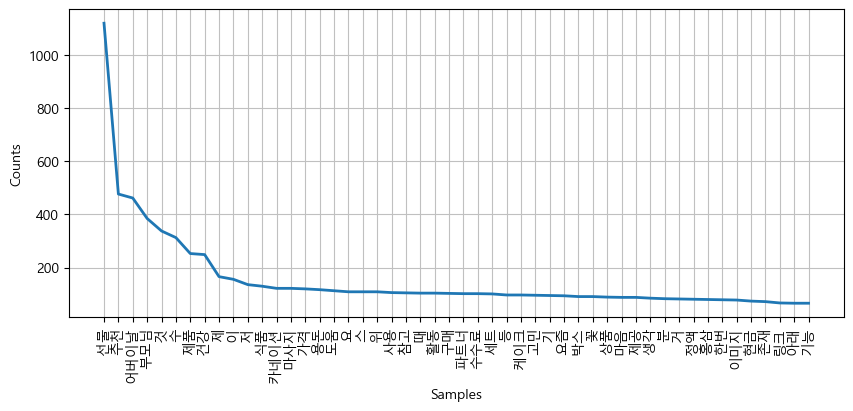

In [5]:
gift = nltk.Text(new_tokens, name='어버이날선물')  # name없어도 됨
plt.figure(figsize=(10,4))
gift.plot(50);

In [6]:
stoptext = """
선물 추천 어버이날 부모님 것 수 제품 건강 제 이 저 식품 가격 도움 요 스 위 사용 참고 
때 활동 구매 파트너 수수료 세트 등 고민 기 요즘 박스 제공 생각 분 거 정액 한번 마음 
 이미지 존재 링크 아래 기능 정말 더 선택 향 기능 부담 지금 쿠팡 하나 관리 가지 양제 포스팅
 답변 가장 방향 주문 준비 인기 브랜드 날 디자인 정보 건 저희 의미 채택 이번 배송 질문 아버지
 일 시간 나이 어머니 꼭 엄마 정도 걸 운동 때문 제작 좀 자 피 번 천 글 제일 다른 관련 최고
  드릴 보시 집 도 후기 포장 할인 평소 아빠 관련 다른 효과 콘드 이친 중 통해 사 직접 전 석고 해
  구성 보충 구 판매 호랑이 고려 그 경우 종류 우리 매일 가성 용 섭취 조금 연골 개 안 사람 검색 바로 확인 성분
  어르신 나 골프 다음
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['탄생석', '골드', '카네이션', '카네이션', '자체', '전체', '도금', '완전', '금', '카네이션']

- 워드 클라우드 그리기

In [7]:
data = gift.vocab().most_common(5) 
data

[('선물', 1120), ('추천', 477), ('어버이날', 462), ('부모님', 385), ('것', 338)]

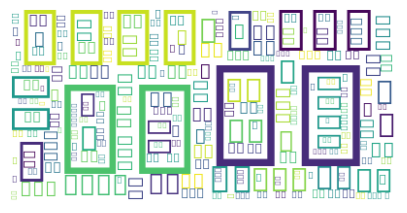

In [8]:
# 오류케이스 -폰트지정 x
wc = WordCloud(
    background_color='white', random_state=2023,
    relative_scaling=0.2
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(5,3))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

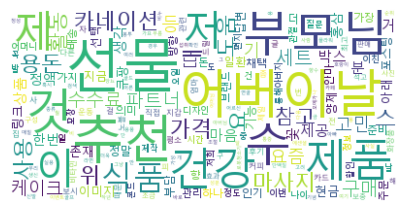

In [9]:
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2
).generate_from_frequencies(dict(gift.vocab().most_common(300))) # frequencies 딕셔너리 씀

plt.figure(figsize=(5,3))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

In [12]:
mask = np.array(Image.open('data/heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

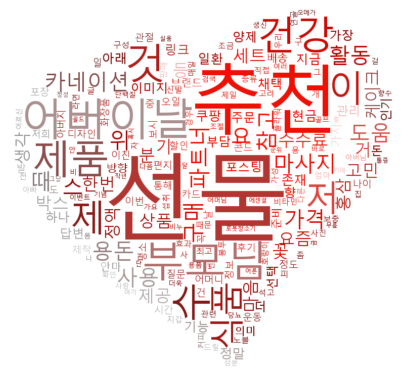

In [14]:
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask=mask
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(5,5))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off');